In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
dataframe = pd.read_csv('Titanic-Dataset.csv')

데이터 확인(컬럼, 1차 데이터 형태 확인, 인덱스, 컬럼별 데이터 타입, 데이터프레임 형태)

중복값, 결측치 확인 전 데이터 프레임 overview를 통해 데이터 타입 분석, 타입 변경이 필요할 경우 변경 수행

In [3]:
df = dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# 데이터 프레임 컬럼별 데이터 타입, 타이타닉은 숫자 혹은 문자로만 이루어져서 비교적 깔끔하고 심지어 정수형/실수형까지 정리됨
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# 데이터프레임 형태
df.shape

(891, 12)

In [8]:
# 컬럼별 고유데이터 수 확인
df.nunique(axis=0, dropna=False)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

중복, 결측치 확인 및 전처리

In [9]:
# 중복값 확인, 위에서부터
df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# 나이 열 결측치 수
print(df['Age'].isna().sum())
print(df['Cabin'].isna().sum())

177
687


In [12]:
# 데이터 기술통계
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 혹시 중앙값으로 대체할 수 있을까 싶어서 중앙값도 추가 확인해봄
print(df['Age'].median())

28.0


In [ ]:
# 결측치 수정의 경우 나이는 객실등급과 성별 기반의 중앙값 조건부 대체(예 : 1등석 여성 - 평균나이가 낮을것, 3등석 남성 - 평균나이가 높을 것, 가족 탑승에 따라 패턴 존재)
# 나이의 경우는 무조건 평균값이나 중앙값 대체를 할 수 없음, 랜덤 포레스트나 XGBoost로 예측하는 방법도 존재한다고 함
# 객실도 크게 의미있는 변수는 아니라서 그냥 Unknown = 그 자체가 정보 로 간주
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [ ]:
# 출항항구.. 라는데 크게 의미 없음
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
# 출항항구 결측치는 크게 의미 없으므로 최빈값 처리
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

본격 데이터 분석(일변량 평균 비교)

In [17]:
# 전체 생존률 (0은 사망, 1은 생존)
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [18]:
# 성별별 생존률 평균 (여성이 월등히 높음, 여성/아이를 먼저 구조하였기 때문인 것으로 생각됨)
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
# 사회적 계층의 영향 (1등석 - 2등석 - 3등석 순)
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
# 연속형 변수의 구간화 연습 -- 나이
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,10,20,40,60,80], labels=['0-10','10-20','20-40','40-60','60-80'])
df.groupby('AgeGroup')['Survived'].mean()

C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\818970888.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


'\n0~10대가 가장 높음 → 여자와 어린이 중심으로 구조하였기 때문\n60~80대가 가장 낮음 → (추측) 살만큼 살았다고 생각하여 양보하였거나 체력 혹은 기력 부족으로 생존률이 저하되었을 것\n'

0~10대가 가장 높음 → 여자와 어린이 중심으로 구조하였기 때문
60~80대가 가장 낮음 → (추측) 살만큼 살았다고 생각하여 양보하였거나 체력 혹은 기력 부족으로 생존률이 저하되었을 것

In [21]:
# 가족 규모(SibSp: 함께 탑승한 형제자매/배우자 수,Parch: 함께 탑승한 부모/자녀 수) 기준
# 2~4인 가족이 생존률이 높은 편
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [22]:
# 사회적 계층의 영향 (요금 순)
# 높은 수준의 요금을 지불한 사람들일수록 생존률이 높은 편
df['FareGroup'] = pd.qcut(df['Fare'], 4)
df.groupby('FareGroup')['Survived'].mean()

C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\2267319416.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareGroup')['Survived'].mean()


FareGroup
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

여기서부터는 다변량 분석

In [23]:
# 성별 + 객실 등급 조합
# 여성 1등급 객실이 가장 높고 남성 3등급 객실이 가장 낮음
df.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [24]:
# 성별 + 나이 그룹 조합
# 전반적으로 여성의 생존률이 높고, 특히 여성 6~80대는 100% 생존하였다고 봐도 무방, 남성은 전반적으로 낮으며 남성 어린이의 생존률이 높음
df.groupby(['Sex','AgeGroup'])['Survived'].mean()


C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\768806040.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex','AgeGroup'])['Survived'].mean()


Sex     AgeGroup
female  0-10        0.612903
        10-20       0.739130
        20-40       0.756614
        40-60       0.755556
        60-80       1.000000
male    0-10        0.575758
        10-20       0.144928
        20-40       0.166220
        40-60       0.192771
        60-80       0.105263
Name: Survived, dtype: float64

In [25]:
# 객실등급 + 요금 조합(객실 등급이 높고 요금이 높으면... 그냥 최상류층인거 아닌가..)
# 1등급 객실에서 14.454 미만 요금을 내는 승객은 없고 그래서 NaN 처리가 정상인데 가장 낮은 값은 0으로 리턴함 -- pandas 연산 이슈라고 함
df.groupby(['Pclass','FareGroup'])['Survived'].mean()


C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\1535235247.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass','FareGroup'])['Survived'].mean()


Pclass  FareGroup      
1       (-0.001, 7.91]     0.000000
        (7.91, 14.454]          NaN
        (14.454, 31.0]     0.529412
        (31.0, 512.329]    0.685535
2       (-0.001, 7.91]     0.000000
        (7.91, 14.454]     0.383721
        (14.454, 31.0]     0.600000
        (31.0, 512.329]    0.545455
3       (-0.001, 7.91]     0.208531
        (7.91, 14.454]     0.253623
        (14.454, 31.0]     0.316832
        (31.0, 512.329]    0.195122
Name: Survived, dtype: float64

In [26]:
# 다변량 테스트
result = (
    df.groupby(['Pclass', 'Sex', 'AgeGroup'], observed=True)['Survived']
      .mean()
      .reset_index()
)

print(result.to_string(index=False))


 Pclass    Sex AgeGroup  Survived
      1 female     0-10  0.000000
      1 female    10-20  1.000000
      1 female    20-40  0.981481
      1 female    40-60  0.958333
      1 female    60-80  1.000000
      1   male     0-10  1.000000
      1   male    10-20  0.400000
      1   male    20-40  0.415385
      1   male    40-60  0.342105
      1   male    60-80  0.083333
      2 female     0-10  1.000000
      2 female    10-20  1.000000
      2 female    20-40  0.914894
      2 female    40-60  0.846154
      2   male     0-10  1.000000
      2   male    10-20  0.100000
      2   male    20-40  0.073529
      2   male    40-60  0.055556
      2   male    60-80  0.333333
      3 female     0-10  0.500000
      3 female    10-20  0.520000
      3 female    20-40  0.534091
      3 female    40-60  0.000000
      3 female    60-80  1.000000
      3   male     0-10  0.363636
      3   male    10-20  0.129630
      3   male    20-40  0.125000
      3   male    40-60  0.074074
      3   male

In [27]:
# 사이킷런 import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# X, y 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 범주형/수치형 열 구분
categorical_cols = ['Sex', 'Embarked', 'AgeGroup', 'FareGroup']
numeric_cols = ['Age', 'Fare', 'FamilySize', 'Pclass', 'SibSp', 'Parch']


In [28]:
# Column Transformer 정의
# Column Transfomer 란 수치형 컬럼에는 이 전처리, 범주형 컬럼에는 저 전처리를 적용해주고 마지막에 다시 합쳐주는 자동 전처리 장치
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)


In [29]:
# 전체 모델 성능 비교(로지스틱 회귀분석, 랜덤포레스트 분류, 서포트 벡터 머신, 다층 신경망)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocess', preprocess),
                              ('model', model)])
    
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    acc = accuracy_score(y, y_pred)
    results[name] = acc

results
# 여기서는 랜덤 포레스트가 가장 성능이 좋은 것으로 나타남(약 98%)

{'Logistic Regression': 0.8114478114478114,
 'Random Forest': 0.9809203142536476,
 'SVM': 0.8383838383838383,
 'Neural Network': 0.8832772166105499}

In [30]:
# 모델 교차검증, F1-score 검증 수행 라이브러리

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold # Titanic은 생존/사망 비율이 다르기 떄문에 계층적 분할 사용


In [31]:
# 비교모델 다시 세팅
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=800, random_state=42)
}


In [32]:
# 교차검증 + F1-score 평가

from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])

    # Accuracy 교차검증
    acc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    # F1-score 교차검증
    f1 = make_scorer(f1_score)
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1)

    results.append({
        "Model": name,
        "Accuracy (CV Mean)": acc_scores.mean(),
        "F1-score (CV Mean)": f1_scores.mean()
    })

results
# 역시 Random Forest가 비교적 성능이 좋음

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the opti

[{'Model': 'Logistic Regression',
  'Accuracy (CV Mean)': np.float64(0.8013621241604418),
  'F1-score (CV Mean)': np.float64(0.7340794958272673)},
 {'Model': 'Random Forest',
  'Accuracy (CV Mean)': np.float64(0.8305128366078713),
  'F1-score (CV Mean)': np.float64(0.7743982449716935)},
 {'Model': 'SVM',
  'Accuracy (CV Mean)': np.float64(0.8282656455966355),
  'F1-score (CV Mean)': np.float64(0.7628940832868203)},
 {'Model': 'Neural Network (MLP)',
  'Accuracy (CV Mean)': np.float64(0.811436821291821),
  'F1-score (CV Mean)': np.float64(0.7421206421715436)}]

In [33]:
# XGBoost 불러오기 및 모델 세팅

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


In [34]:
# LightGB 불러오기 및 모델 세팅
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=500,
    num_leaves=31,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [35]:
# XGBoost vs LightGBM 모델 비교 검증

models = {
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    
    acc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1)
    
    results.append({
        "Model": name,
        "Accuracy (CV Mean)": acc_scores.mean(),
        "F1-score (CV Mean)": f1_scores.mean()
    })

results
# 전반적으로 둘다 Random Forest와 성능이 비슷하다. 왜일까.

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 273, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382889 -> initscore=-0.477303
[LightGBM] [Info] Start training from score -0.477303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[{'Model': 'XGBoost',
  'Accuracy (CV Mean)': np.float64(0.8338773460548616),
  'F1-score (CV Mean)': np.float64(0.7730610983042278)},
 {'Model': 'LightGBM',
  'Accuracy (CV Mean)': np.float64(0.8327537505492437),
  'F1-score (CV Mean)': np.float64(0.7764329819318035)}]

In [ ]:
# 신경망 튜닝(성능 업그레이드 시도, 필수 아님)

deep_nn = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0005,              # L2 정규화
    learning_rate='adaptive',
    max_iter=2000,
    early_stopping=True,
    random_state=42
)


In [ ]:
# 심층 신경망 교차검증점수 산출

pipeline_nn = Pipeline([
    ('preprocess', preprocess),
    ('model', deep_nn)
])

acc_scores_nn = cross_val_score(pipeline_nn, X, y, cv=cv, scoring='accuracy')
f1_scores_nn = cross_val_score(pipeline_nn, X, y, cv=cv, scoring=f1)

{
    "Model": "Deep Neural Network",
    "Accuracy (CV Mean)": acc_scores_nn.mean(),
    "F1-score (CV Mean)": f1_scores_nn.mean()
}
# 오히려 신경망보다 성능이 떨어짐을 확인, 최종 모델은 Random Forest로 결정

{'Model': 'Deep Neural Network',
 'Accuracy (CV Mean)': np.float64(0.766549494695876),
 'F1-score (CV Mean)': np.float64(0.6587327236629213)}

In [38]:
# 랜덤 포레스트 파이프라인 재학습
final_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

final_model.fit(X, y)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
# 전처리 이후 실제 feature 가져오기
# ColumnTransformer 내부에서 OneHotEncoder가 생성한 컬럼 이름 포함
ohe = final_model.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

# 숫자 컬럼은 그대로
feature_names = list(numeric_cols) + list(ohe_features)


In [40]:
# 랜덤포레스트 feature importance 가져오기
importances = final_model.named_steps['model'].feature_importances_


In [41]:
# 데이터프레임 만들기
fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi


,Feature,Importance
6,Sex_male,0.244744
1,Fare,0.228039
0,Age,0.222297
3,Pclass,0.075833
2,FamilySize,0.052423
4,SibSp,0.033130
8,Embarked_S,0.025751
5,Parch,0.025041
15,"FareGroup_(31.0, 512.329]",0.018651
10,AgeGroup_20-40,0.016195


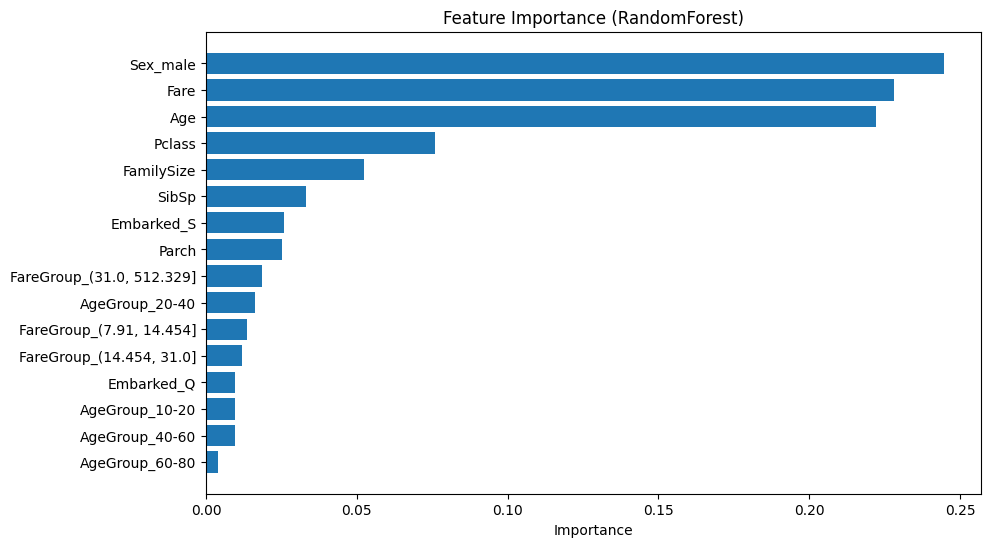

In [42]:
# 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(fi['Feature'], fi['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance"),
plt.title("Feature Importance (RandomForest)")
plt.show()


Feture Importance는 중요도 순위에서 중요한 영향을 미친 변수 ≠ 생존률(positive)이 아님 
생존률이 높거나 낮은데 '높은 영향을 미친' 요소임

In [43]:
# 로그선형 회귀분석을 위해 필요한 변수만 추출하여 데이터 구성
X_lr = df[['Sex', 'Pclass', 'Age', 'Fare']]
y_lr = df['Survived']

In [44]:
# 로지스틱 회귀를 위해 성별을 숫자형 처리
X_lr['Sex'] = X_lr['Sex'].map({'female': 0, 'male': 1})

C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\2170740344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lr['Sex'] = X_lr['Sex'].map({'female': 0, 'male': 1})


In [45]:
# 혹시모를 결측치 처리
X_lr['Age'] = X_lr['Age'].fillna(df['Age'].median())
X_lr['Fare'] = X_lr['Fare'].fillna(df['Fare'].median())


C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\910819563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lr['Age'] = X_lr['Age'].fillna(df['Age'].median())
C:\Users\obliv\AppData\Local\Temp\ipykernel_21544\910819563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lr['Fare'] = X_lr['Fare'].fillna(df['Fare'].median())


In [46]:
# 로지스틱 회귀 학습

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_lr, y_lr)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
# 회귀 계수 확인
import pandas as pd

coef = pd.DataFrame({
    "Feature": X_lr.columns,
    "Coefficient": model_lr.coef_[0]
})

coef


,Feature,Coefficient
0,Sex,-2.483877
1,Pclass,-1.205043
2,Age,-0.036481
3,Fare,0.000523


In [48]:
import numpy as np

coef['Odds_Ratio'] = coef['Coefficient'].apply(lambda x: np.exp(x))
coef

,Feature,Coefficient,Odds_Ratio
0,Sex,-2.483877,0.083419
1,Pclass,-1.205043,0.299679
2,Age,-0.036481,0.964176
3,Fare,0.000523,1.000523


✔ Sex (남자=1)

Coefficient: 음(-)

Odds Ratio < 1
→ 남성일수록 생존률이 감소
→ 예: Odds Ratio = 0.08 → “남성은 여성보다 생존 확률이 92% 감소”

✔ Pclass

Coefficient: 음(-)

Odds Ratio < 1
→ 등급이 낮아질수록 생존률 감소
→ Pclass=3은 Pclass=1 대비 생존 확률 크게 감소

✔ Age

Coefficient: 음(-)

Odds Ratio < 1
→ 나이가 많을수록 생존률이 감소
→ 대략적으로 1살 증가당 생존률 약간 감소

✔ Fare

Coefficient: 양(+)

Odds Ratio > 1
→ 요금이 높을수록 생존 확률 증가
→ 돈 많이 낸 사람은 좋은 객실·구조 접근성↑

In [49]:
model_lr.intercept_


array([4.79221683])